In [1]:
import time
import numpy as np
from datetime import datetime, timedelta
import shutil
import pickle
import copy
import gc

import pandas as pd
pd.options.display.max_columns=100
pd.options.display.max_rows=100

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import os
sys.path.append(f'{os.path.dirname(os.getcwd())}/utils')
from data_util import (download_data_local_check, prep_stock_data, prep_fx_data, calc_sharpe)

In [3]:
data_source = 'fx' # 'fx', 'stock'

if data_source == 'fx':
    ### FX data #######
    fx_files = [
                 'EURUSD_1h_2003-2020.csv',
                 'GBPUSD_1h_2003-2020.csv',
                 'USDJPY_1h_2003-2020.csv',
                 'NZDUSD_1h_2003-2020.csv',
                 'AUDUSD_1h_2003-2020.csv',
                 'USDCAD_1h_2003-2020.csv',
                 'USDCHF_1h_2003-2020.csv',
                ]

    loaded_files = prep_fx_data(fx_files)
        
if data_source == 'stock':
    ### stock data ######
    start = '2000-01-01'
    end = '2020-11-1'
    ## download data
    all_stock_data = download_data_local_check('SP500', start, end)
    loaded_files = prep_stock_data(all_stock_data, filter_start_date_tuple=None) #(2015,1,1)

EURUSD_1h_2003-2020.csv
GBPUSD_1h_2003-2020.csv
USDJPY_1h_2003-2020.csv
NZDUSD_1h_2003-2020.csv
AUDUSD_1h_2003-2020.csv
USDCAD_1h_2003-2020.csv
USDCHF_1h_2003-2020.csv


In [4]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
series = loaded_files['EURUSD_1h_2003-2020.csv']['Close']
series = series.resample('1D').last()
series = series.pct_change().dropna()
series

Gmt time
2003-08-04    0.007499
2003-08-05    0.003391
2003-08-06   -0.004776
2003-08-07    0.002435
2003-08-08   -0.005165
                ...   
2020-10-19    0.004498
2020-10-20    0.005158
2020-10-21    0.001911
2020-10-22   -0.003122
2020-10-23    0.003606
Freq: D, Name: Close, Length: 6291, dtype: float64

predicted=0.000633, expected=0.005659
predicted=0.000277, expected=-0.013892
predicted=-0.000344, expected=-0.003931
predicted=-0.002726, expected=-0.005029
predicted=-0.003008, expected=0.000000
predicted=-0.002898, expected=-0.000164
predicted=-0.002767, expected=-0.000123
predicted=-0.004001, expected=-0.003911
predicted=-0.002278, expected=0.001306
predicted=-0.001509, expected=0.001378
predicted=-0.000136, expected=-0.002474
predicted=-0.000559, expected=0.000000
predicted=-0.000814, expected=-0.000780
predicted=-0.000756, expected=-0.001225
predicted=-0.000225, expected=0.000658
predicted=-0.000437, expected=-0.005238
predicted=-0.001441, expected=-0.000884
predicted=-0.001383, expected=-0.007049
predicted=-0.002305, expected=0.000000
predicted=-0.002367, expected=-0.004566
predicted=-0.002675, expected=-0.000795
predicted=-0.003150, expected=-0.005462
predicted=-0.003088, expected=-0.003243
predicted=-0.003635, expected=-0.003524
predicted=-0.002900, expected=0.004121
predicted=

predicted=-0.000434, expected=0.002167
predicted=-0.001291, expected=-0.006242
predicted=-0.001214, expected=-0.004965
predicted=-0.003974, expected=-0.005090
predicted=-0.005134, expected=0.000000
predicted=-0.004568, expected=0.000194
predicted=-0.002144, expected=0.000305
predicted=-0.002645, expected=0.009517
predicted=-0.000237, expected=-0.001134
predicted=0.000931, expected=0.005776
predicted=0.002089, expected=-0.000537
predicted=0.002372, expected=0.000000
predicted=0.002325, expected=-0.000829
predicted=0.002089, expected=0.010600
predicted=0.002242, expected=-0.002110
predicted=0.002644, expected=-0.007573
predicted=-0.000320, expected=-0.003715
predicted=-0.001065, expected=0.003894
predicted=0.000254, expected=0.000000
predicted=0.000681, expected=-0.001420
predicted=-0.001949, expected=-0.001532
predicted=-0.001987, expected=-0.005991
predicted=-0.001399, expected=0.001644
predicted=-0.000692, expected=0.001779
predicted=-0.000712, expected=0.003882
predicted=-0.000187, e

predicted=0.003099, expected=-0.000372
predicted=0.001449, expected=0.002845
predicted=0.002004, expected=-0.005541
predicted=0.001397, expected=0.000000
predicted=0.001560, expected=-0.002666
predicted=0.000698, expected=-0.004188
predicted=-0.001532, expected=-0.002980
predicted=-0.002186, expected=-0.002019
predicted=-0.002882, expected=-0.001160
predicted=-0.002078, expected=0.001882
predicted=-0.001864, expected=0.000000
predicted=-0.001352, expected=-0.000593
predicted=-0.000885, expected=-0.008695
predicted=-0.001817, expected=-0.000154
predicted=-0.001731, expected=-0.000853
predicted=-0.001151, expected=0.000826
predicted=-0.001377, expected=-0.008446
predicted=-0.002995, expected=0.000000
predicted=-0.003287, expected=-0.000512
predicted=-0.001349, expected=-0.003579
predicted=-0.001857, expected=-0.000845
predicted=-0.002298, expected=-0.000634
predicted=-0.002365, expected=0.007020
predicted=0.000279, expected=0.005482
predicted=0.001350, expected=0.000000
predicted=0.00122

predicted=0.000847, expected=0.002696


C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.001504, expected=-0.003248
predicted=0.001061, expected=0.000000
predicted=0.001036, expected=0.000783
predicted=0.001436, expected=-0.000018
predicted=0.000058, expected=-0.001895
predicted=-0.000287, expected=0.002309
predicted=-0.000488, expected=0.000160
predicted=0.000349, expected=-0.008527
predicted=-0.001121, expected=0.000000
predicted=-0.001708, expected=0.000610
predicted=-0.001051, expected=0.001739
predicted=-0.000351, expected=-0.002156
predicted=-0.001390, expected=0.003228
predicted=-0.001107, expected=0.001707
predicted=0.000956, expected=0.001392
predicted=0.001147, expected=0.000000
predicted=0.000906, expected=0.001212
predicted=0.000818, expected=0.001130
predicted=0.001495, expected=-0.002933
predicted=0.000485, expected=0.000562
predicted=0.000081, expected=-0.000419
predicted=-0.000009, expected=0.001836
predicted=0.000295, expected=0.000000
predicted=0.000068, expected=-0.000569
predicted=-0.000308, expected=-0.002110
predicted=-0.000169, expected=0

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.000072, expected=0.001475
predicted=0.000007, expected=0.000000
predicted=-0.000023, expected=-0.000086
predicted=0.000752, expected=0.000144
predicted=0.001026, expected=0.000727
predicted=0.000590, expected=-0.004502
predicted=-0.000296, expected=0.014547
predicted=0.001505, expected=-0.004808
predicted=0.001633, expected=0.000000
predicted=0.000636, expected=0.000761
predicted=0.000822, expected=-0.006224
predicted=0.000264, expected=-0.003835
predicted=0.000022, expected=0.007651
predicted=-0.001221, expected=0.010174
predicted=0.001848, expected=-0.007063
predicted=0.000509, expected=0.000000
predicted=-0.000672, expected=0.000038
predicted=0.001093, expected=0.005356
predicted=0.003030, expected=-0.003174
predicted=0.001159, expected=0.003971
predicted=-0.000511, expected=0.002086
predicted=0.001435, expected=0.002430
predicted=0.001870, expected=0.000000
predicted=0.001756, expected=-0.001391
predicted=0.000555, expected=-0.002352
predicted=0.000781, expected=0.00890

predicted=0.002731, expected=0.001646
predicted=0.002790, expected=-0.003681
predicted=0.001398, expected=0.000516
predicted=0.001663, expected=0.007489
predicted=0.001504, expected=-0.003563
predicted=0.000784, expected=0.004962
predicted=0.000859, expected=0.000000
predicted=0.000961, expected=-0.000085
predicted=0.001619, expected=0.006300
predicted=0.002391, expected=-0.000838
predicted=0.001352, expected=0.003429
predicted=0.002163, expected=0.002599
predicted=0.001844, expected=-0.009190
predicted=0.000572, expected=0.000000
predicted=0.000015, expected=0.000331
predicted=-0.000455, expected=0.001919
predicted=0.000152, expected=-0.003856
predicted=-0.001333, expected=0.000774
predicted=-0.001996, expected=0.000587
predicted=0.000017, expected=0.004240
predicted=0.000743, expected=0.000000
predicted=0.000703, expected=0.000448
predicted=0.000202, expected=-0.004203
predicted=0.000279, expected=-0.002989
predicted=-0.000383, expected=0.002845
predicted=0.000070, expected=-0.004935

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000429, expected=-0.004156
predicted=-0.000582, expected=0.000000
predicted=-0.001265, expected=0.001863
predicted=-0.001177, expected=0.000926
predicted=-0.000991, expected=0.002590
predicted=0.000400, expected=0.000235
predicted=0.000199, expected=0.008502
predicted=0.002200, expected=0.000574
predicted=0.002700, expected=0.000000
predicted=0.002002, expected=-0.001479
predicted=0.001565, expected=-0.004926
predicted=0.000572, expected=0.001121
predicted=0.000609, expected=-0.006950
predicted=-0.001670, expected=0.002784
predicted=-0.001767, expected=0.001988
predicted=-0.001121, expected=0.000000
predicted=-0.000870, expected=-0.000578
predicted=-0.000446, expected=0.001860
predicted=-0.000310, expected=0.002717
predicted=0.001568, expected=-0.009856
predicted=-0.000438, expected=0.005929
predicted=-0.000517, expected=0.000159
predicted=0.000403, expected=0.000000
predicted=0.000316, expected=-0.001666
predicted=-0.000660, expected=-0.005970
predicted=-0.001962, expecte

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.001347, expected=-0.002660
predicted=-0.001749, expected=-0.000042
predicted=-0.001716, expected=0.000000
predicted=-0.001096, expected=-0.000382
predicted=-0.001408, expected=0.000739
predicted=-0.000849, expected=-0.002887
predicted=-0.000846, expected=0.007997
predicted=0.000704, expected=-0.005204
predicted=0.000424, expected=-0.002149
predicted=-0.000573, expected=0.000000
predicted=-0.000438, expected=-0.000511
predicted=-0.000224, expected=0.003449
predicted=0.000650, expected=0.004515
predicted=-0.000007, expected=0.003438
predicted=0.001477, expected=-0.002147
predicted=0.001403, expected=0.000726


C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.001331, expected=0.000000
predicted=0.001748, expected=-0.000860
predicted=0.001099, expected=0.001730
predicted=0.000438, expected=-0.001171
predicted=-0.000219, expected=0.003635
predicted=0.000586, expected=0.003294
predicted=0.001163, expected=0.004950
predicted=0.001942, expected=0.000000
predicted=0.002087, expected=0.000000
predicted=0.001610, expected=0.001008
predicted=0.002097, expected=0.004230
predicted=0.002337, expected=-0.004203
predicted=0.001241, expected=0.004638
predicted=0.000622, expected=-0.002983
predicted=0.000641, expected=0.000000
predicted=0.000410, expected=0.000549
predicted=0.000326, expected=-0.005583
predicted=-0.001111, expected=-0.003459
predicted=-0.001273, expected=0.002297
predicted=-0.001612, expected=0.007268
predicted=0.000404, expected=0.013004
predicted=0.002441, expected=0.000000
predicted=0.002356, expected=-0.000607
predicted=0.002572, expected=0.006119
predicted=0.004367, expected=0.000342
predicted=0.004833, expected=-0.007375


C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.002125, expected=-0.005135
predicted=-0.002462, expected=0.001734
predicted=-0.002324, expected=0.000000
predicted=-0.001701, expected=-0.000536
predicted=-0.001114, expected=-0.003390
predicted=-0.002287, expected=-0.007491
predicted=-0.002543, expected=-0.003386
predicted=-0.002287, expected=0.003197
predicted=-0.001839, expected=-0.002803
predicted=-0.002044, expected=0.000000


C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.002525, expected=-0.000042
predicted=-0.001917, expected=-0.001790
predicted=-0.000723, expected=-0.005531
predicted=-0.001153, expected=-0.001719
predicted=-0.002149, expected=0.005656
predicted=-0.000524, expected=0.002166
predicted=0.000115, expected=0.000000
predicted=-0.000300, expected=0.001080
predicted=-0.000025, expected=-0.001799
predicted=0.000938, expected=-0.009270
predicted=-0.000250, expected=-0.000482
predicted=-0.001652, expected=-0.002082
predicted=-0.001827, expected=-0.001790
predicted=-0.002199, expected=0.000000
predicted=-0.002704, expected=-0.000323
predicted=-0.002362, expected=0.002108
predicted=-0.000445, expected=-0.000178
predicted=-0.000347, expected=-0.006676
predicted=-0.001144, expected=0.001093
predicted=-0.000955, expected=-0.006322
predicted=-0.001445, expected=0.000000
predicted=-0.001702, expected=0.003486
predicted=-0.001440, expected=-0.005330
predicted=-0.002032, expected=-0.007621
predicted=-0.002683, expected=0.011016
predicted=-0

predicted=-0.000750, expected=0.002271
predicted=0.000220, expected=0.001058
predicted=0.001182, expected=-0.001030
predicted=-0.000413, expected=0.000555
predicted=-0.000842, expected=0.002388
predicted=0.000883, expected=0.000000
predicted=0.001003, expected=0.000000
predicted=0.000436, expected=0.002083
predicted=0.000575, expected=-0.003834
predicted=0.000341, expected=-0.003012
predicted=-0.000489, expected=0.004496
predicted=-0.000166, expected=-0.000835
predicted=0.000139, expected=-0.005148
predicted=-0.001040, expected=0.000000
predicted=-0.001728, expected=-0.000035
predicted=-0.000626, expected=0.003999
predicted=0.000540, expected=0.002335
predicted=0.000075, expected=0.000941
predicted=0.000262, expected=0.006148
predicted=0.002046, expected=-0.007690
predicted=0.001196, expected=0.000000
predicted=0.000659, expected=0.000343
predicted=0.000380, expected=0.002392
predicted=0.000611, expected=0.001193
predicted=0.000440, expected=-0.004644
predicted=-0.001468, expected=0.00

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.000633, expected=-0.000515
predicted=-0.000027, expected=0.001126
predicted=0.000356, expected=-0.005099
predicted=-0.002017, expected=-0.001288
predicted=-0.001776, expected=-0.000649
predicted=-0.001042, expected=-0.002686
predicted=-0.001354, expected=0.000000
predicted=-0.001519, expected=0.000317
predicted=-0.001588, expected=0.000334
predicted=-0.000617, expected=-0.000484
predicted=-0.000559, expected=0.002006
predicted=-0.000174, expected=-0.006455
predicted=-0.000569, expected=0.008009
predicted=0.000303, expected=0.000000
predicted=0.000885, expected=0.000833
predicted=0.000664, expected=0.001463
predicted=0.000739, expected=0.000472
predicted=0.000754, expected=0.004416
predicted=0.002546, expected=-0.003230
predicted=0.000802, expected=0.000568
predicted=0.000581, expected=0.000000
predicted=0.000609, expected=-0.000035
predicted=0.000491, expected=-0.001694
predicted=0.000026, expected=-0.002291
predicted=-0.001171, expected=-0.003778
predicted=-0.001190, expec

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.001188, expected=0.000000
predicted=0.001423, expected=-0.000424
predicted=0.000994, expected=0.001484
predicted=0.000682, expected=0.001606
predicted=0.000378, expected=0.006535
predicted=0.001760, expected=-0.004786
predicted=0.000934, expected=-0.006445
predicted=-0.000552, expected=0.000000
predicted=-0.000502, expected=-0.000434
predicted=-0.000248, expected=0.001735


C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000426, expected=-0.003650
predicted=-0.002294, expected=-0.001925
predicted=-0.001977, expected=-0.001982
predicted=-0.001058, expected=-0.001060
predicted=-0.001129, expected=0.000000
predicted=-0.001123, expected=0.000464
predicted=-0.001368, expected=-0.001622
predicted=-0.001009, expected=-0.000152
predicted=-0.000821, expected=0.003695
predicted=0.000173, expected=-0.001992
predicted=0.000254, expected=-0.000713
predicted=-0.000186, expected=0.000000
predicted=-0.000228, expected=0.000348
predicted=0.000298, expected=0.003334
predicted=0.000782, expected=0.000888
predicted=0.000363, expected=0.000914
predicted=0.000732, expected=-0.001392
predicted=0.000635, expected=0.003330
predicted=0.001157, expected=0.000000
predicted=0.001338, expected=0.000460
predicted=0.000688, expected=0.000133
predicted=0.000499, expected=-0.001752
predicted=0.000172, expected=0.001063
predicted=0.000496, expected=-0.005453
predicted=-0.000787, expected=0.000525
predicted=-0.000986, expect

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000797, expected=-0.003921
predicted=-0.001793, expected=0.003175
predicted=-0.000446, expected=0.002433
predicted=0.000725, expected=0.001268
predicted=0.000675, expected=0.000146
predicted=0.000481, expected=0.000000
predicted=0.000436, expected=0.000656
predicted=0.001302, expected=-0.001065
predicted=0.000644, expected=-0.001076
predicted=-0.000028, expected=0.002235
predicted=0.000091, expected=0.002403
predicted=0.000614, expected=0.002025
predicted=0.000891, expected=0.000000
predicted=0.000697, expected=-0.000426
predicted=0.000788, expected=-0.000209
predicted=0.001000, expected=0.000771
predicted=0.000802, expected=0.003562
predicted=0.000967, expected=0.004578
predicted=0.001417, expected=0.004126
predicted=0.002068, expected=0.000000
predicted=0.002109, expected=-0.001298
predicted=0.001844, expected=-0.000385
predicted=0.001726, expected=-0.002027
predicted=0.000967, expected=0.000297
predicted=0.000134, expected=-0.002587
predicted=-0.000930, expected=-0.0021

predicted=-0.000669, expected=0.000730
predicted=0.000419, expected=0.004136
predicted=0.001611, expected=0.006215
predicted=0.001994, expected=0.003006
predicted=0.002521, expected=0.000000
predicted=0.002291, expected=-0.001539
predicted=0.001926, expected=-0.005273
predicted=0.001091, expected=-0.005925
predicted=-0.000611, expected=-0.003727
predicted=-0.002255, expected=0.003528
predicted=-0.002070, expected=0.000092
predicted=-0.001857, expected=0.000000
predicted=-0.001950, expected=0.000055
predicted=-0.001186, expected=-0.002620
predicted=-0.000434, expected=0.003340
predicted=0.000654, expected=-0.002250
predicted=-0.000056, expected=-0.001386
predicted=-0.000534, expected=0.001138
predicted=-0.000417, expected=0.000000
predicted=-0.000167, expected=0.000028
predicted=0.000172, expected=0.008809
predicted=0.000932, expected=0.001109
predicted=0.001903, expected=0.004906
predicted=0.002520, expected=-0.002787
predicted=0.001935, expected=-0.004658
predicted=0.001130, expected=

C:\Users\Jameshuckle\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.003172, expected=-0.004223
predicted=0.002679, expected=0.005299
predicted=0.002354, expected=0.007750
predicted=0.003002, expected=-0.008137
predicted=0.002184, expected=0.000000
predicted=0.001316, expected=0.000484
predicted=0.000113, expected=-0.001757
predicted=0.001005, expected=0.004532
predicted=0.000387, expected=0.004943
predicted=0.000053, expected=0.000270
predicted=0.001554, expected=-0.007495
predicted=-0.000009, expected=0.000000
predicted=-0.000300, expected=-0.000441
predicted=0.000528, expected=-0.003820
predicted=-0.000801, expected=-0.000111
predicted=-0.002121, expected=0.005045
predicted=-0.001183, expected=0.001831
predicted=0.000684, expected=0.002192
predicted=0.000704, expected=0.000000
predicted=0.000705, expected=0.000878
predicted=0.001584, expected=0.001915
predicted=0.002002, expected=0.006055
predicted=0.002193, expected=-0.008597
predicted=0.000637, expected=0.002178
predicted=-0.000057, expected=-0.006285
predicted=-0.000521, expected=0.000

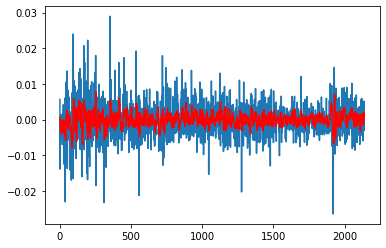

In [7]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

win perc 0.4212248714352501


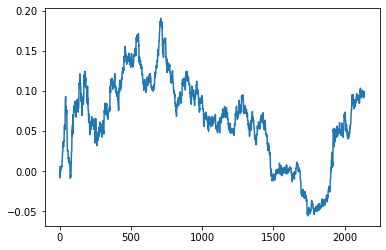

In [8]:
results = pd.DataFrame(pd.Series([x[0] for x in predictions], name='preds'))
results['label'] = pd.Series(test[:len(predictions)])
results['preds_bool'] = (results['preds'] > 0).astype(int).replace({0:-1})
results['return'] = results['preds_bool'] * results['label']
results['return'].cumsum().plot()
win_perc = (results['return'] > 0).sum() / len(results)
print('win perc', win_perc)

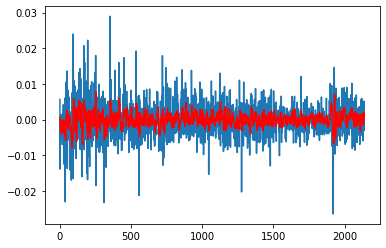

In [9]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()